In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tensorflow import keras

Mounted at /content/drive


In [2]:
#Read stock prices data
stock = pd.read_csv("stock_.csv")
stock.head()

Date       AAPL         BA          T    MGM        AMZN         IBM  \
0  2012-01-12  60.198570  75.510002  30.120001  12.13  175.929993  180.550003   
1  2012-01-13  59.972858  74.599998  30.070000  12.35  178.419998  179.160004   
2  2012-01-17  60.671429  75.239998  30.250000  12.25  181.660004  180.000000   
3  2012-01-18  61.301430  75.059998  30.330000  12.73  189.440002  181.070007   
4  2012-01-19  61.107143  75.559998  30.420000  12.80  194.449997  180.520004   

        TSLA        GOOG        sp500  
0  28.250000  313.644379  1295.500000  
1  22.790001  311.328064  1289.089966  
2  26.600000  313.116364  1293.670044  
3  26.809999  315.273285  1308.040039  
4  26.760000  318.590851  1314.500000

In [3]:
#Read the stocks volume data
volume = pd.read_csv("stock_volume.csv")
volume.head()

Date      AAPL       BA         T       MGM     AMZN      IBM  \
0  2012-01-12  53146800  3934500  26511100  17891100  5385800  6881000   
1  2012-01-13  56505400  4641100  22096800  16621800  4753500  5279200   
2  2012-01-17  60724300  3700100  23500200  15480800  5644500  6003400   
3  2012-01-18  69197800  4189500  22015000  18387600  7473500  4600600   
4  2012-01-19  65434600  5397300  25524000  14022900  7096000  8567200   

      TSLA      GOOG       sp500  
0   729300   3764400  4019890000  
1  5500400   4631800  3692370000  
2  4651600   3832800  4010490000  
3  1260200   5544000  4096160000  
4  1246300  12657800  4465890000

In [4]:
#Sort the data based on Date
stocks_df = stock.sort_values(by = ["Date"])
stocks_df.head()

Date       AAPL         BA          T    MGM        AMZN         IBM  \
0  2012-01-12  60.198570  75.510002  30.120001  12.13  175.929993  180.550003   
1  2012-01-13  59.972858  74.599998  30.070000  12.35  178.419998  179.160004   
2  2012-01-17  60.671429  75.239998  30.250000  12.25  181.660004  180.000000   
3  2012-01-18  61.301430  75.059998  30.330000  12.73  189.440002  181.070007   
4  2012-01-19  61.107143  75.559998  30.420000  12.80  194.449997  180.520004   

        TSLA        GOOG        sp500  
0  28.250000  313.644379  1295.500000  
1  22.790001  311.328064  1289.089966  
2  26.600000  313.116364  1293.670044  
3  26.809999  315.273285  1308.040039  
4  26.760000  318.590851  1314.500000

In [5]:
#Sort the volume data based on Date
volume_df = volume.sort_values(by = ["Date"])
volume_df.head()

Date      AAPL       BA         T       MGM     AMZN      IBM  \
0  2012-01-12  53146800  3934500  26511100  17891100  5385800  6881000   
1  2012-01-13  56505400  4641100  22096800  16621800  4753500  5279200   
2  2012-01-17  60724300  3700100  23500200  15480800  5644500  6003400   
3  2012-01-18  69197800  4189500  22015000  18387600  7473500  4600600   
4  2012-01-19  65434600  5397300  25524000  14022900  7096000  8567200   

      TSLA      GOOG       sp500  
0   729300   3764400  4019890000  
1  5500400   4631800  3692370000  
2  4651600   3832800  4010490000  
3  1260200   5544000  4096160000  
4  1246300  12657800  4465890000

In [6]:
# Check if Null values exist in stock prices data
stocks_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [7]:
# Check if Null values exist in stocks volume data
volume_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [8]:
# Get stock prices dataframe info
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


In [9]:
# Get stock volume dataframe info
volume_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2159 non-null   object
 1   AAPL    2159 non-null   int64 
 2   BA      2159 non-null   int64 
 3   T       2159 non-null   int64 
 4   MGM     2159 non-null   int64 
 5   AMZN    2159 non-null   int64 
 6   IBM     2159 non-null   int64 
 7   TSLA    2159 non-null   int64 
 8   GOOG    2159 non-null   int64 
 9   sp500   2159 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 185.5+ KB


#MINI CHALLENGE #1:
* What is the average trading volume for Apple stock?
* What is the maximum trading volume for sp500?
* Which security is traded the most? comment on your answer
* What is the average stock price of the S&P500 over the specified time period?
* What is the maximum price of Tesla Stock?**



In [15]:
print("Average trading volume for Apple stock is",volume_df.AAPL.mean())

Average trading volume for Apple stock is 58203317.41547012


In [11]:
volume_df.describe()

AAPL            BA             T           MGM          AMZN  \
count  2.159000e+03  2.159000e+03  2.159000e+03  2.159000e+03  2.159000e+03   
mean   5.820332e+07  6.419916e+06  2.832131e+07  9.845582e+06  4.102673e+06   
std    4.568141e+07  9.711873e+06  1.428911e+07  7.295753e+06  2.290722e+06   
min    1.136200e+07  7.889000e+05  6.862400e+06  9.507000e+05  8.813000e+05   
25%    2.769930e+07  3.031850e+06  2.002150e+07  5.796450e+06  2.675700e+06   
50%    4.209420e+07  3.991000e+06  2.485930e+07  7.899800e+06  3.494800e+06   
75%    7.182480e+07  5.325900e+06  3.210565e+07  1.104055e+07  4.768150e+06   
max    3.765300e+08  1.032128e+08  1.950827e+08  9.009820e+07  2.385610e+07   

                IBM          TSLA          GOOG         sp500  
count  2.159000e+03  2.159000e+03  2.159000e+03  2.159000e+03  
mean   4.453090e+06  7.001302e+06  2.498238e+06  3.680732e+09  
std    2.462811e+06  5.781208e+06  1.928407e+06  8.622717e+08  
min    1.193000e+06  3.649000e+05  7.900000e+03  1.248960e+09  
25%    3.111250e+06  3.433450e+06  1.325400e+06  3.211890e+09  
50%    3.825000e+06  5.581100e+06  1.813900e+06  3.526890e+09  
75%    4.937300e+06  8.619550e+06  3.245350e+06  3.933290e+09  
max    3.049020e+07  6.093880e+07  2.497790e+07  9.044690e+09

In [19]:
print("The maximum trading volume for S&P500 is",volume_df.sp500.max())

The maximum trading volume for S&P500 is 9044690000


In [ ]:
stocks_df.describe()

AAPL           BA            T          MGM         AMZN  \
count  2159.000000  2159.000000  2159.000000  2159.000000  2159.000000   
mean    140.819823   189.942700    35.162899    23.105743   915.665665   
std      70.827601   103.678586     3.207490     6.963847   697.838905   
min      55.790001    67.239998    26.770000     7.140000   175.929993   
25%      89.165714   124.015000    33.040001    18.545000   316.490005   
50%     116.599998   142.419998    34.930000    23.780001   676.010010   
75%     175.019997   297.044998    37.419998    28.430000  1593.645019   
max     455.609985   440.619995    43.470001    38.029999  3225.000000   

               IBM         TSLA         GOOG        sp500  
count  2159.000000  2159.000000  2159.000000  2159.000000  
mean    161.853001   259.600815   783.712512  2218.749554  
std      25.561938   210.988003   334.448057   537.321727  
min      94.769997    22.790001   278.481171  1278.040039  
25%     142.769997   184.595001   527.214416  1847.984985  
50%     156.949997   231.960007   737.599976  2106.629883  
75%     185.974998   307.350006  1079.744995  2705.810059  
max     215.800003  1643.000000  1568.489990  3386.149902

In [16]:
# Which security is traded the most
print("The S&P 500 index is a wide index of significant firms traded on U.S. stock exchanges.Over lengthy periods of time, passively holding the index frequently outperforms actively trading or choosing individual equities.Over lengthy time periods, the index often outperforms actively managed funds.")

The S&P 500 index is a wide index of significant firms traded on U.S. stock exchanges.Over lengthy periods of time, passively holding the index frequently outperforms actively trading or choosing individual equities.Over lengthy time periods, the index often outperforms actively managed funds.


In [18]:
#What is the average stock price of the S&P500 over the specified time period?
print("Average stock price of the S&P500 over the specified time period",volume_df.sp500.mean())

Average stock price of the S&P500 over the specified time period 3680732468.7355256


In [20]:
#What is the maximum price of Tesla Stock?
print("The maximum stock price for Tesla is",stocks_df.TSLA.max())

The maximum stock price for Tesla is 1643.0


#TASK #3: PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION


In [21]:
# Function to normalize stock prices based on their initial price
def normalize(df):
  x = df.copy()
  for j in x.columns[1:]:
    x[j] = x[j]/x[j][0]
  return x

In [22]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)

  for i in df.columns[1:]:
    fig.add_scatter(x = df["Date"], y = df[i], name = i)

  fig.show()

In [23]:
# plot interactive chart for stocks data
interactive_plot(stocks_df, 'Stock Prices')

MINI CHALLENGE #2:

• Plot the volume dataset for all stocks, list any observations you might see.

• Plot the normalized stock prices and volume dataset

In [24]:
# Plot the volume dataset for all stocks, list any observations you might see.
interactive_plot(volume_df, 'Stocks Volume')

In [26]:
# Plot the normalized stock prices and volume dataset
interactive_plot(normalize(stocks_df), 'Stock Prices')

In [27]:
# Let's normalize the data and re-plot interactive chart for volume data
interactive_plot(normalize(volume_df), 'Normalized Volume')

# TASK #4: PREPARE THE DATA BEFORE TRAINING THE AI/ML MODEL

In [28]:
# Function to concatenate the date, stock price, and volume in one dataframe
def individual_stock(stock_df, vol_df, name):
    return pd.DataFrame({'Date': stock_df['Date'], 'Close': stock_df[name], 'Volume': vol_df[name]})

In [29]:
# Function to return the input/output (target) data for AI/ML Model
# Note that our goal is to predict the future stock price 
# Target stock price today will be tomorrow's price 
def trading_window(data):
  
  # 1 day window 
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)
  
  # return the new dataset 
  return data

In [31]:
# Let's test the functions and get individual stock prices and volumes for AAPL
price_volume_df = individual_stock(stocks_df, volume_df, 'AAPL')
price_volume_df.head()

Date      Close    Volume
0  2012-01-12  60.198570  53146800
1  2012-01-13  59.972858  56505400
2  2012-01-17  60.671429  60724300
3  2012-01-18  61.301430  69197800
4  2012-01-19  61.107143  65434600

In [32]:
price_volume_target_df = trading_window(price_volume_df)
price_volume_target_df.head()

Date      Close    Volume     Target
0  2012-01-12  60.198570  53146800  59.972858
1  2012-01-13  59.972858  56505400  60.671429
2  2012-01-17  60.671429  60724300  61.301430
3  2012-01-18  61.301430  69197800  61.107143
4  2012-01-19  61.107143  65434600  60.042858

In [33]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df.head()

Date      Close    Volume     Target
0  2012-01-12  60.198570  53146800  59.972858
1  2012-01-13  59.972858  56505400  60.671429
2  2012-01-17  60.671429  60724300  61.301430
3  2012-01-18  61.301430  69197800  61.107143
4  2012-01-19  61.107143  65434600  60.042858

In [34]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [35]:
price_volume_target_scaled_df

array([[0.01102638, 0.11442624, 0.01046185],
       [0.01046185, 0.12362365, 0.01220906],
       [0.01220906, 0.13517696, 0.01378478],
       ...,
       [1.        , 0.10747163, 0.97208751],
       [0.97208751, 0.10431171, 0.98824476],
       [0.98824476, 0.11430054, 0.95470465]])

In [37]:

price_volume_target_scaled_df.shape

(2158, 3)

In [38]:
# Create Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [39]:

X.shape, y.shape

((2158, 2), (2158, 1))

In [40]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [41]:
X_train.shape, y_train.shape

((1402, 2), (1402, 1))

In [43]:
X_test.shape, y_test.shape

((756, 2), (756, 1))

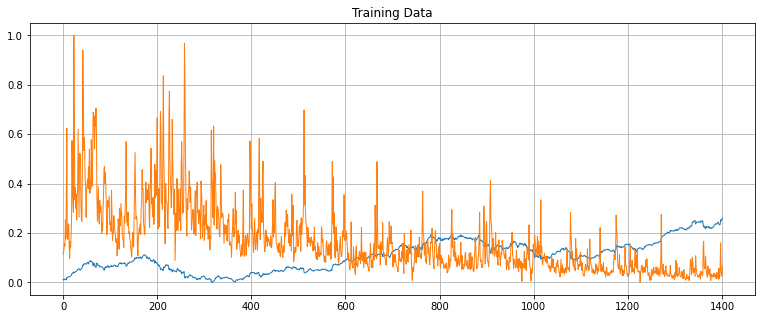

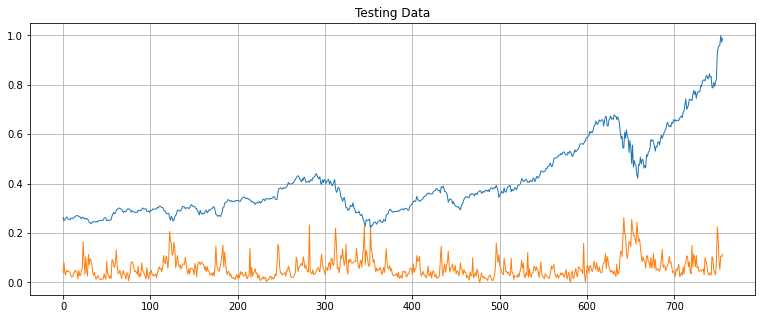

In [44]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 1)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

MINI CHALLENGE #3:

• Test the created pipeline with S&P500 and Amazon datasets


In [50]:
# Let's test the functions and get individual stock prices and volumes for S&P500
price_volume_df = individual_stock(stocks_df, volume_df, 'sp500')
price_volume_df.head()

Date        Close      Volume
0  2012-01-12  1295.500000  4019890000
1  2012-01-13  1289.089966  3692370000
2  2012-01-17  1293.670044  4010490000
3  2012-01-18  1308.040039  4096160000
4  2012-01-19  1314.500000  4465890000

In [51]:
# Let's test the functions and get individual stock prices and volumes for Amazon 
price_volume_df = individual_stock(stocks_df,volume_df, 'AMZN')
price_volume_df.head()

Date       Close   Volume
0  2012-01-12  175.929993  5385800
1  2012-01-13  178.419998  4753500
2  2012-01-17  181.660004  5644500
3  2012-01-18  189.440002  7473500
4  2012-01-19  194.449997  7096000

# TASK #7: BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [52]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()
regression_model.fit(X_train, y_train)

Ridge()

In [53]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.7950028030821767


In [54]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.03466412],
       [0.03374627],
       [0.03451936],
       ...,
       [0.81048342],
       [0.78876033],
       [0.80091324]])

In [55]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [57]:
len(Predicted)

2158

In [58]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [59]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted.head()

Date
0  2012-01-12
1  2012-01-13
2  2012-01-17
3  2012-01-18
4  2012-01-19

In [60]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted.head()

Date     Close
0  2012-01-12  0.011026
1  2012-01-13  0.010462
2  2012-01-17  0.012209
3  2012-01-18  0.013785
4  2012-01-19  0.013299

In [61]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted.head()

Date     Close  Prediction
0  2012-01-12  0.011026    0.034664
1  2012-01-13  0.010462    0.033746
2  2012-01-17  0.012209    0.034519
3  2012-01-18  0.013785    0.034556
4  2012-01-19  0.013299    0.034707

In [62]:
from sklearn.metrics import mean_squared_error
mean_squared_error( df_predicted['Prediction'], df_predicted['Close'])**0.5

0.04109893296864373

In [63]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

MINI CHALLENGE #4:

• Experiment with various regularization values for alpha

• What is the impact of increasing alpha?

• Note: default value for alpha is = 1


In [64]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge(alpha = 2)
regression_model.fit(X_train, y_train)

Ridge(alpha=2)

In [65]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Quadratic Regression Score: ", lr_accuracy)

Quadratic Regression Score:  0.4710364276441906


In [66]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.04926081],
       [0.04814634],
       [0.04833925],
       ...,
       [0.6911385 ],
       [0.67329543],
       [0.68296001]])

In [67]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [68]:
len(Predicted)

2158

In [69]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [70]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted.head()

Date
0  2012-01-12
1  2012-01-13
2  2012-01-17
3  2012-01-18
4  2012-01-19

In [71]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted.head()

Date     Close
0  2012-01-12  0.011026
1  2012-01-13  0.010462
2  2012-01-17  0.012209
3  2012-01-18  0.013785
4  2012-01-19  0.013299

In [72]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted.head()

Date     Close  Prediction
0  2012-01-12  0.011026    0.049261
1  2012-01-13  0.010462    0.048146
2  2012-01-17  0.012209    0.048339
3  2012-01-18  0.013785    0.047473
4  2012-01-19  0.013299    0.047996

In [73]:
from sklearn.metrics import mean_squared_error
mean_squared_error( df_predicted['Prediction'], df_predicted['Close'])**0.5

0.06712202355537161

In [74]:
# Plot the results
interactive_plot(df_predicted, "Actual Vs. Prediction")

#TASK #12: TRAIN AN LSTM TIME SERIES MODEL

In [76]:
# Let's test the functions and get individual stock prices and volumes for AAPL
price_volume_df = individual_stock(stocks_df, volume_df, 'sp500')
price_volume_df.head()

Date        Close      Volume
0  2012-01-12  1295.500000  4019890000
1  2012-01-13  1289.089966  3692370000
2  2012-01-17  1293.670044  4010490000
3  2012-01-18  1308.040039  4096160000
4  2012-01-19  1314.500000  4465890000

In [77]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[1.29550000e+03, 4.01989000e+09],
       [1.28908997e+03, 3.69237000e+09],
       [1.29367004e+03, 4.01049000e+09],
       ...,
       [3.35128003e+03, 4.10486000e+09],
       [3.36046997e+03, 4.31857000e+09],
       [3.33368994e+03, 5.08765000e+09]])

In [78]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [79]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [80]:
X

[array([0.00828228]),
 array([0.00524163]),
 array([0.00741423]),
 array([0.01423076]),
 array([0.0172951]),
 array([0.01771253]),
 array([0.01800663]),
 array([0.01736626]),
 array([0.02277871]),
 array([0.01915935]),
 array([0.01816315]),
 array([0.01658831]),
 array([0.0163037]),
 array([0.02184418]),
 array([0.02253203]),
 array([0.03171561]),
 array([0.03144519]),
 array([0.03273549]),
 array([0.03411583]),
 array([0.0350598]),
 array([0.03064355]),
 array([0.03497445]),
 array([0.034372]),
 array([0.03092341]),
 array([0.03794869]),
 array([0.03946186]),
 array([0.03992672]),
 array([0.03776843]),
 array([0.04051967]),
 array([0.04160122]),
 array([0.04247878]),
 array([0.04465612]),
 array([0.04157279]),
 array([0.04556211]),
 array([0.04344649]),
 array([0.04093236]),
 array([0.03098508]),
 array([0.03538239]),
 array([0.04168189]),
 array([0.04403469]),
 array([0.04413903]),
 array([0.05593158]),
 array([0.05513944]),
 array([0.05908607]),
 array([0.05983085]),
 array([0.06247

In [81]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [82]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [83]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((1510, 1, 1), (648, 1, 1))

In [84]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(50, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(50, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(50)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 50)             10400     
                                                                 
 dropout (Dropout)           (None, 1, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 50)             20200     
                                                                 
 dropout_1 (Dropout)         (None, 1, 50)             0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51    

In [85]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs = 100,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/100
38/38 [==============================] - 13s 42ms/step - loss: 0.0458 - val_loss: 0.0769
Epoch 2/100
38/38 [==============================] - 0s 9ms/step - loss: 0.0134 - val_loss: 0.0501
Epoch 3/100
38/38 [==============================] - 0s 9ms/step - loss: 0.0083 - val_loss: 0.0154
Epoch 4/100
38/38 [==============================] - 0s 7ms/step - loss: 0.0025 - val_loss: 7.0226e-04
Epoch 5/100
38/38 [==============================] - 0s 7ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 6/100
38/38 [==============================] - 0s 7ms/step - loss: 9.4419e-04 - val_loss: 0.0027
Epoch 7/100
38/38 [==============================] - 0s 7ms/step - loss: 9.0057e-04 - val_loss: 0.0017
Epoch 8/100
38/38 [==============================] - 0s 7ms/step - loss: 7.1634e-04 - val_loss: 0.0011
Epoch 9/100
38/38 [==============================] - 0s 8ms/step - loss: 7.3620e-04 - val_loss: 2.3800e-04
Epoch 10/100
38/38 [==============================] - 0s 7ms/step - loss: 6.3598e-0

In [86]:
# Make prediction
predicted = model.predict(X)

MINI CHALLENGE #5 SOLUTION:

• Test the pipeline with at least 3 other stocks

• Experiment with various LSTM model parameters (Ex: Use 150 units instead 
of 50), print out the model summary and retrain the mode

In [89]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm_3 (LSTM)               (None, 1, 150)            91200     
                                                                 
 dropout_2 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_4 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_3 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_5 (LSTM)               (None, 150)               180600    
                                                                 
 dense_1 (Dense)             (None, 1)                 151 

In [90]:
# Trail the model
history = model.fit(
    X_train, y_train,
    epochs = 100,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/100
38/38 [==============================] - 9s 47ms/step - loss: 0.0306 - val_loss: 0.0591
Epoch 2/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0068 - val_loss: 0.0042
Epoch 3/100
38/38 [==============================] - 1s 14ms/step - loss: 5.6921e-04 - val_loss: 1.2506e-04
Epoch 4/100
38/38 [==============================] - 0s 13ms/step - loss: 4.2005e-04 - val_loss: 5.3751e-04
Epoch 5/100
38/38 [==============================] - 1s 14ms/step - loss: 3.6272e-04 - val_loss: 6.5724e-05
Epoch 6/100
38/38 [==============================] - 0s 12ms/step - loss: 3.3856e-04 - val_loss: 2.1220e-04
Epoch 7/100
38/38 [==============================] - 0s 13ms/step - loss: 3.3849e-04 - val_loss: 1.1386e-04
Epoch 8/100
38/38 [==============================] - 1s 13ms/step - loss: 3.2007e-04 - val_loss: 1.1334e-04
Epoch 9/100
38/38 [==============================] - 0s 13ms/step - loss: 2.8565e-04 - val_loss: 3.5988e-05
Epoch 10/100
38/38 [========================

In [91]:
# Make prediction
predicted = model.predict(X)